<a href="https://colab.research.google.com/github/Pachaq/SISTEMA-DE-REIGISTRO-ANG/blob/main/Telecom_X_An%C3%A1lisis_De_Evasi%C3%B3n_De_Clientes1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TELECOM X - ANÁLISIS DE EVASIÓN DE CLIENTES

#📌 Extracción

In [1]:
import pandas as pd
import json

# Load the data from the JSON file
with open('/content/TelecomX_Data.json', 'r') as f:
    data = json.load(f)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
display(df.head())

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
# Display the column names and their data types
print(df.info())

# Display the first few rows of the DataFrame to understand the data structure
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación



In [3]:
# Check for missing values in the DataFrame and sum them by column
missing_values = df.isnull().sum()

# Display the sum of missing values for each column
display(missing_values)

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [5]:
# Check for duplicate customerID values, as customerID should be unique for each row
duplicate_customer_ids = df.duplicated(subset=['customerID']).sum()

# Display the total count of duplicate customer IDs
print(f"Total number of duplicate customer IDs: {duplicate_customer_ids}")

Total number of duplicate customer IDs: 0


In [7]:
nested_columns = ['customer', 'phone', 'internet', 'account']

# Create a copy to avoid modifying the original DataFrame in place during concatenation
df_flattened = df.copy()

for col in nested_columns:
    # Normalize the nested column into a new DataFrame
    normalized_df = pd.json_normalize(df_flattened[col])

    # Concatenate the original DataFrame (excluding the nested column) with the normalized DataFrame
    df_flattened = pd.concat([df_flattened.drop(columns=[col]), normalized_df], axis=1)

# Update the original df variable with the flattened DataFrame
df = df_flattened

# Display the first few rows of the updated DataFrame
display(df.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Verificando inconsistencias y errores de formato en las columnas

In [8]:
for col in df.columns:
    print(f"\n--- Analyzing column: {col} ---")
    if df[col].dtype == 'object':
        unique_values = df[col].unique()
        print(f"Data type: object")
        print(f"Number of unique values: {len(unique_values)}")
        # Print unique values, but limit the list for columns with many unique values
        if len(unique_values) < 50:
            print(f"Unique values: {unique_values}")
        else:
            print(f"Unique values: {unique_values[:50]}...") # Display only the first 50
    elif df[col].dtype in ['int64', 'float64']:
        print(f"Data type: {df[col].dtype}")
        display(df[col].describe())
    else:
        print(f"Data type: {df[col].dtype} (No specific analysis performed for this type)")


--- Analyzing column: customerID ---
Data type: object
Number of unique values: 7267
Unique values: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS'
 '0017-DINOC' '0017-IUDMW' '0018-NYROU' '0019-EFAEP' '0019-GFNTW'
 '0020-INWCK' '0020-JDNXP' '0021-IKXGC' '0022-TCJCI' '0023-HGHWL'
 '0023-UYUPN' '0023-XUOPT' '0027-KWYKW' '0030-FNXPP' '0031-PVLZI'
 '0032-PGELS' '0036-IHMOT' '0040-HALCW' '0042-JVWOJ' '0042-RLHYP'
 '0047-ZHDTW' '0048-LUMLS' '0048-PIHNL' '0052-DCKON' '0052-YNYOT'
 '0056-EPFBG' '0057-QBUQH' '0058-EVZWM' '0060-FUALY' '0064-SUDOG'
 '0064-YIJGF' '0067-DKWBL' '0068-FIGTF' '0071-NDAFP' '0074-HDKDG'
 '0076-LVEPS' '0078-XZMHT' '0080-EMYVY' '0080-OROZO' '0082-LDZUE']...

--- Analyzing column: Churn ---
Data type: object
Number of unique values: 3
Unique values: ['No' 'Yes' '']

--- Analyzing column: gender ---
Data type: object
Number of unique values: 2
Unique values: ['Female' 'Male']

--- Analyzing

,SeniorCitizen
count,7267.000000
mean,0.162653
std,0.369074
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000



--- Analyzing column: Partner ---
Data type: object
Number of unique values: 2
Unique values: ['Yes' 'No']

--- Analyzing column: Dependents ---
Data type: object
Number of unique values: 2
Unique values: ['Yes' 'No']

--- Analyzing column: tenure ---
Data type: int64


,tenure
count,7267.000000
mean,32.346498
std,24.571773
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000



--- Analyzing column: PhoneService ---
Data type: object
Number of unique values: 2
Unique values: ['Yes' 'No']

--- Analyzing column: MultipleLines ---
Data type: object
Number of unique values: 3
Unique values: ['No' 'Yes' 'No phone service']

--- Analyzing column: InternetService ---
Data type: object
Number of unique values: 3
Unique values: ['DSL' 'Fiber optic' 'No']

--- Analyzing column: OnlineSecurity ---
Data type: object
Number of unique values: 3
Unique values: ['No' 'Yes' 'No internet service']

--- Analyzing column: OnlineBackup ---
Data type: object
Number of unique values: 3
Unique values: ['Yes' 'No' 'No internet service']

--- Analyzing column: DeviceProtection ---
Data type: object
Number of unique values: 3
Unique values: ['No' 'Yes' 'No internet service']

--- Analyzing column: TechSupport ---
Data type: object
Number of unique values: 3
Unique values: ['Yes' 'No' 'No internet service']

--- Analyzing column: StreamingTV ---
Data type: object
Number of unique value

,Charges.Monthly
count,7267.000000
mean,64.720098
std,30.129572
min,18.250000
25%,35.425000
50%,70.300000
75%,89.875000
max,118.750000



--- Analyzing column: Charges.Total ---
Data type: object
Number of unique values: 6531
Unique values: ['593.3' '542.4' '280.85' '1237.85' '267.4' '571.45' '7904.25' '5377.8'
 '340.35' '5957.9' '2460.55' '8456.75' '351.5' '7261.25' '2560.1' '6849.4'
 '1993.2' '72.1' '2791.5' '25.1' '1306.3' '1215.6' '1849.95' '57.2'
 '76.35' '30.5' '5656.75' '1090.6' '471.85' '1396.9' '929.3' '3247.55'
 '900.9' '7942.15' '1343.4' '825.4' '1070.15' '4959.6' '5597.65' '224.5'
 '1929' '91.1' '2078.95' '630.6' '1611' '1242.45' '6316.2' '727.85' '3532'
 '44.3']...


In [14]:
# Handle the empty string in the 'Churn' column. Replace '' with NaN for consistency.
df['Churn'] = df['Churn'].replace('', pd.NA)

# Convert 'Charges.Total' to numeric, coercing errors to NaN.
# This handles potential non-numeric strings that caused it to be object type.
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

# Check for missing values again after handling the inconsistencies
print("\n--- Missing values after handling inconsistencies ---")
display(df.isnull().sum())

# Re-analyze the 'Churn' and 'Charges.Total' columns to confirm changes
print("\n--- Analyzing column: Churn after cleaning ---")
print(f"Data type: {df['Churn'].dtype}")
print(f"Unique values: {df['Churn'].unique()}")

print("\n--- Analyzing column: Charges.Total after cleaning ---")
print(f"Data type: {df['Charges.Total'].dtype}")
display(df['Charges.Total'].describe())


--- Missing values after handling inconsistencies ---


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0



--- Analyzing column: Churn after cleaning ---
Data type: object
Unique values: ['No' 'Yes']

--- Analyzing column: Charges.Total after cleaning ---
Data type: float64


,Charges.Total
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


In [11]:
# Check for duplicate rows based on all columns
duplicates_before = df.duplicated().sum()
print(f"Number of duplicate rows before dropping: {duplicates_before}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify that duplicate rows have been removed
duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows after dropping: {duplicates_after}")

Number of duplicate rows before dropping: 0
Number of duplicate rows after dropping: 0


valores faltantes


In [12]:
# 1. Standardize the 'gender' column to have consistent capitalization
df['gender'] = df['gender'].str.capitalize()

# 2. Standardize other categorical columns by examining unique values and correcting
categorical_cols_to_check = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

for col in categorical_cols_to_check:
    if col in df.columns:
        # Check unique values for potential inconsistencies
        unique_vals = df[col].unique()
        print(f"Column '{col}' unique values before standardization: {unique_vals}")

        # Example standardization (replace specific inconsistencies if found)
        # This part might need adjustment based on the actual unique values found
        # For now, assuming standard Yes/No or service names are expected
        if 'No internet service' in unique_vals and 'No' in unique_vals:
             df[col] = df[col].replace('No internet service', 'No')
        if 'No phone service' in unique_vals and 'No' in unique_vals:
             df[col] = df[col].replace('No phone service', 'No')


# 3. Confirm numerical columns have the correct data types
numerical_cols_to_check = ['SeniorCitizen', 'tenure', 'Charges.Monthly', 'Charges.Total']

for col in numerical_cols_to_check:
    if col in df.columns:
        # Attempt to convert to numeric, coercing errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

# After potential coercing, check for new missing values in numerical columns
print("\nMissing values in numerical columns after type conversion:")
display(df[numerical_cols_to_check].isnull().sum())

# 4. Display data types and sample unique values for categorical columns
print("\n--- Verification after cleaning ---")
print("Data types:")
display(df.info())

print("\nSample unique values for standardized categorical columns:")
for col in ['gender'] + categorical_cols_to_check:
     if col in df.columns:
        print(f"\nColumn '{col}': {df[col].unique()}")

# Display descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
display(df[numerical_cols_to_check].describe())

Column 'Partner' unique values before standardization: ['Yes' 'No']
Column 'Dependents' unique values before standardization: ['Yes' 'No']
Column 'PhoneService' unique values before standardization: ['Yes' 'No']
Column 'MultipleLines' unique values before standardization: ['No' 'Yes' 'No phone service']
Column 'InternetService' unique values before standardization: ['DSL' 'Fiber optic' 'No']
Column 'OnlineSecurity' unique values before standardization: ['No' 'Yes' 'No internet service']
Column 'OnlineBackup' unique values before standardization: ['Yes' 'No' 'No internet service']
Column 'DeviceProtection' unique values before standardization: ['No' 'Yes' 'No internet service']
Column 'TechSupport' unique values before standardization: ['Yes' 'No' 'No internet service']
Column 'StreamingTV' unique values before standardization: ['Yes' 'No' 'No internet service']
Column 'StreamingMovies' unique values before standardization: ['No' 'Yes' 'No internet service']
Column 'Contract' unique val

,0
SeniorCitizen,0
tenure,0
Charges.Monthly,0
Charges.Total,0



--- Verification after cleaning ---
Data types:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16

None


Sample unique values for standardized categorical columns:

Column 'gender': ['Female' 'Male']

Column 'Partner': ['Yes' 'No']

Column 'Dependents': ['Yes' 'No']

Column 'PhoneService': ['Yes' 'No']

Column 'MultipleLines': ['No' 'Yes']

Column 'InternetService': ['DSL' 'Fiber optic' 'No']

Column 'OnlineSecurity': ['No' 'Yes']

Column 'OnlineBackup': ['Yes' 'No']

Column 'DeviceProtection': ['No' 'Yes']

Column 'TechSupport': ['Yes' 'No']

Column 'StreamingTV': ['Yes' 'No']

Column 'StreamingMovies': ['No' 'Yes']

Column 'Contract': ['One year' 'Month-to-month' 'Two year']

Column 'PaperlessBilling': ['Yes' 'No']

Column 'PaymentMethod': ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Descriptive statistics for numerical columns:


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
# Calculate 'Cuentas_Diarias' by dividing 'Charges.Monthly' by the average number of days in a month (approx. 30.44)
df['Cuentas_Diarias'] = df['Charges.Monthly'] / 30.44

# Display the first few rows with the new column
display(df[['Charges.Monthly', 'Cuentas_Diarias']].head())

,Charges.Monthly,Cuentas_Diarias
0,65.6,2.155059
1,59.9,1.967806
2,73.9,2.427727
3,98.0,3.219448
4,83.9,2.756242


In [17]:
# Identify columns with object data type
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of object columns
print("Object columns in the DataFrame:")
print(object_columns)

Object columns in the DataFrame:
['customerID', 'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [18]:
# Create a dictionary to map 'Yes' to 1 and 'No' to 0
binary_mapping = {'Yes': 1, 'No': 0}

# Identify columns that have only 'Yes' and 'No' as unique values (excluding potential NaN)
# Filter out 'customerID' and 'Churn' as they will be handled separately or are the target variable
binary_cols = [col for col in df.columns if df[col].dtype == 'object' and
               df[col].dropna().unique().tolist() in [['Yes', 'No'], ['No', 'Yes']]]

# Apply the mapping dictionary to these identified binary columns
for col in binary_cols:
    df[col] = df[col].map(binary_mapping)

# Identify categorical columns with more than two unique values (excluding the binary ones and those already handled)
multi_category_cols = [col for col in df.columns if df[col].dtype == 'object' and col not in ['customerID', 'Churn'] and col not in binary_cols]

print("Binary columns converted to 1/0:")
print(binary_cols)

print("\nMulti-category columns for one-hot encoding:")
print(multi_category_cols)

# Display the first few rows of the DataFrame to show the changes in binary columns
display(df.head())

Binary columns converted to 1/0:
['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

Multi-category columns for one-hot encoding:
['gender', 'InternetService', 'Contract', 'PaymentMethod']


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.155059
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.427727
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.756242


In [19]:
# Apply one-hot encoding to the identified multi-category columns
df_encoded = pd.get_dummies(df, columns=multi_category_cols, drop_first=False)

# Display the first few rows of the DataFrame to show the new one-hot encoded columns
display(df_encoded.head())

# Display the column names of the encoded DataFrame to verify the new columns
print("\nColumns after one-hot encoding:")
print(df_encoded.columns.tolist())

,customerID,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0002-ORFBO,0,0,1,1,9,1,0,0,1,...,True,False,False,False,True,False,False,False,False,True
1,0003-MKNFE,0,0,0,0,9,1,1,0,0,...,True,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,1,0,0,0,4,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
3,0011-IGKFF,1,1,1,0,13,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
4,0013-EXCHZ,1,1,1,0,3,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True



Columns after one-hot encoding:
['customerID', 'Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'gender_Female', 'gender_Male', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


In [20]:
# Create a dictionary to map current column names to desired new names
# Standardizing to snake_case and removing special characters like '.'
column_mapping = {
    'Charges.Monthly': 'charges_monthly',
    'Charges.Total': 'charges_total',
    'customerID': 'customer_id',
    'SeniorCitizen': 'senior_citizen',
    'PhoneService': 'phone_service',
    'MultipleLines': 'multiple_lines',
    'InternetService': 'internet_service',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod_Bank transfer (automatic)': 'payment_method_bank_transfer_automatic',
    'PaymentMethod_Credit card (automatic)': 'payment_method_credit_card_automatic',
    'PaymentMethod_Electronic check': 'payment_method_electronic_check',
    'PaymentMethod_Mailed check': 'payment_method_mailed_check',
    'Contract_Month-to-month': 'contract_month_to_month',
    'Contract_One year': 'contract_one_year',
    'Contract_Two year': 'contract_two_year',
    'InternetService_DSL': 'internet_service_dsl',
    'InternetService_Fiber optic': 'internet_service_fiber_optic',
    'InternetService_No': 'internet_service_no',
    'gender': 'gender',
    'Partner': 'partner',
    'Dependents': 'dependents',
    'tenure': 'tenure',
    'Cuentas_Diarias': 'cuentas_diarias',
    'Churn': 'churn' # Keep churn name but ensure it's in the map
}

# Rename the columns in the DataFrame
df_encoded.rename(columns=column_mapping, inplace=True)

# Display the updated column names
print("Updated column names:")
print(df_encoded.columns.tolist())

Updated column names:
['customer_id', 'churn', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'charges_monthly', 'charges_total', 'cuentas_diarias', 'gender_Female', 'gender_Male', 'internet_service_dsl', 'internet_service_fiber_optic', 'internet_service_no', 'contract_month_to_month', 'contract_one_year', 'contract_two_year', 'payment_method_bank_transfer_automatic', 'payment_method_credit_card_automatic', 'payment_method_electronic_check', 'payment_method_mailed_check']


In [21]:
# Display data types of all columns in df_encoded
print("Data types of columns in df_encoded:")
display(df_encoded.info())

# Verify transformation and renaming for representative columns
# 1. A binary column (e.g., 'partner')
print("\nAnalysis of 'partner' column:")
print(f"Data type: {df_encoded['partner'].dtype}")
print(f"Unique values: {df_encoded['partner'].unique()}")

# 2. A one-hot encoded column (e.g., 'contract_month_to_month')
print("\nAnalysis of 'contract_month_to_month' column:")
print(f"Data type: {df_encoded['contract_month_to_month'].dtype}")
print(f"Unique values: {df_encoded['contract_month_to_month'].unique()}")

# 3. A numerical column (e.g., 'charges_total')
print("\nAnalysis of 'charges_total' column:")
print(f"Data type: {df_encoded['charges_total'].dtype}")
display(df_encoded['charges_total'].describe())

Data types of columns in df_encoded:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer_id                             7032 non-null   object 
 1   churn                                   7032 non-null   int64  
 2   senior_citizen                          7032 non-null   int64  
 3   partner                                 7032 non-null   int64  
 4   dependents                              7032 non-null   int64  
 5   tenure                                  7032 non-null   int64  
 6   phone_service                           7032 non-null   int64  
 7   multiple_lines                          7032 non-null   int64  
 8   online_security                         7032 non-null   int64  
 9   online_backup                           7032 non-null   int64  
 10  device_protection           

None


Analysis of 'partner' column:
Data type: int64
Unique values: [1 0]

Analysis of 'contract_month_to_month' column:
Data type: bool
Unique values: [False  True]

Analysis of 'charges_total' column:
Data type: float64


,charges_total
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


In [22]:
# Display descriptive statistics for numerical columns
print("Descriptive statistics for numerical columns:")
display(df_encoded.describe())

# Display descriptive statistics for boolean columns (created from one-hot encoding)
print("\nDescriptive statistics for boolean columns:")
display(df_encoded.select_dtypes(include=['bool']).describe())

Descriptive statistics for numerical columns:


,churn,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,charges_monthly,charges_total,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.128719
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,0.988370
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.599540
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.169103
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.311104
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.952119
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.901117



Descriptive statistics for boolean columns:


,gender_Female,gender_Male,internet_service_dsl,internet_service_fiber_optic,internet_service_no,contract_month_to_month,contract_one_year,contract_two_year,payment_method_bank_transfer_automatic,payment_method_credit_card_automatic,payment_method_electronic_check,payment_method_mailed_check
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,False,True,False,False,False,True,False,False,False,False,False,False
freq,3549,3549,4616,3936,5512,3875,5560,5347,5490,5511,4667,5428


#📊 Carga y análisis

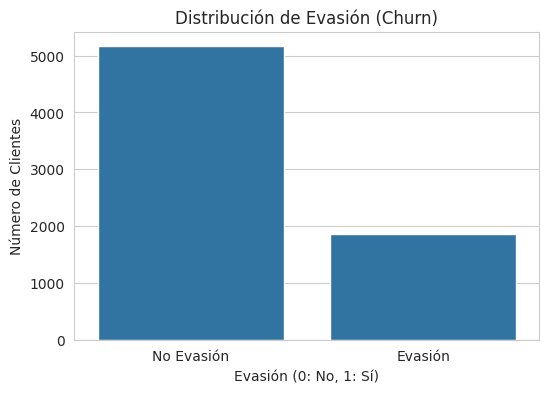

Distribución de la variable 'churn':


,count
churn,
0,5163
1,1869



Proporción de la variable 'churn':


,proportion
churn,
0,0.734215
1,0.265785


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set_style("whitegrid")

# Create a count plot of the 'churn' column
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df_encoded)
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('Evasión (0: No, 1: Sí)')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['No Evasión', 'Evasión'])
plt.show()

# Display the exact counts and proportions
print("Distribución de la variable 'churn':")
display(df_encoded['churn'].value_counts())

print("\nProporción de la variable 'churn':")
display(df_encoded['churn'].value_counts(normalize=True))

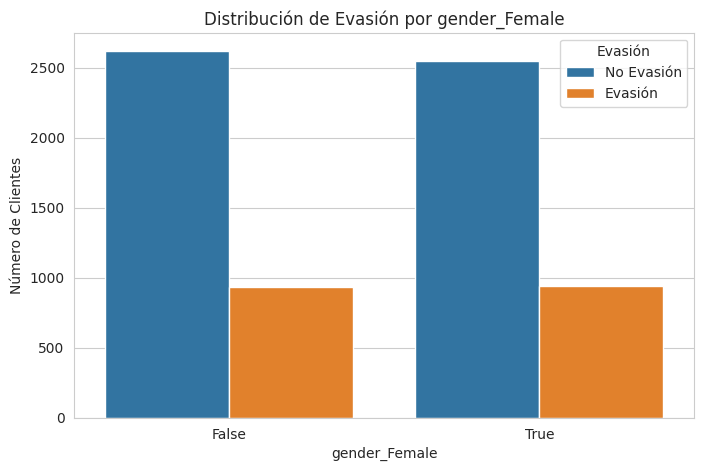


Distribución de 'gender_Female' por 'churn':


churn,0,1
gender_Female,,
False,2619,930
True,2544,939


--------------------------------------------------


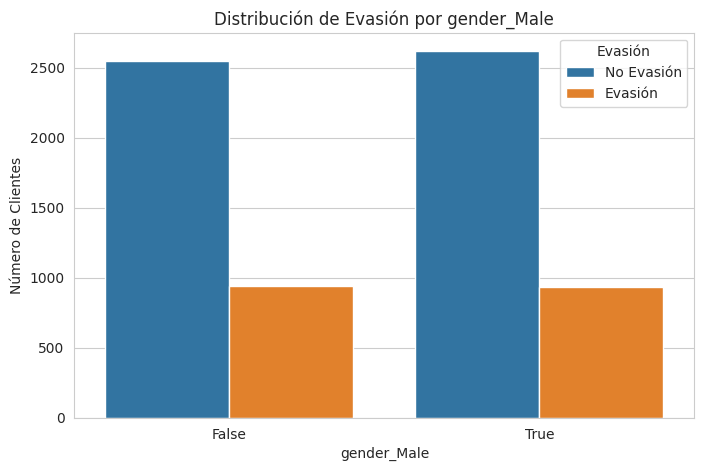


Distribución de 'gender_Male' por 'churn':


churn,0,1
gender_Male,,
False,2544,939
True,2619,930


--------------------------------------------------


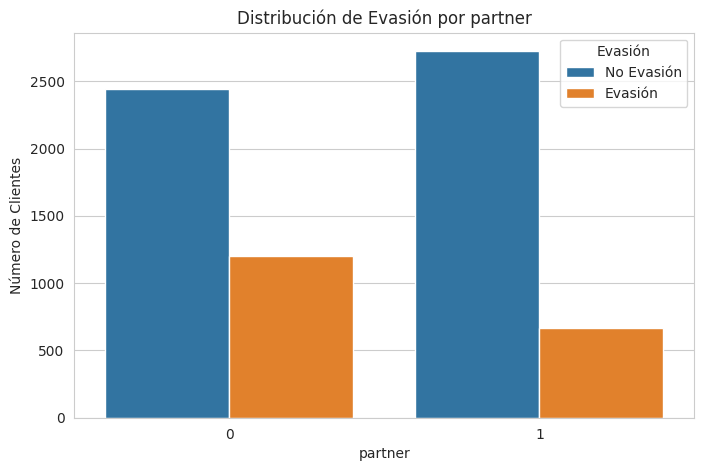


Distribución de 'partner' por 'churn':


churn,0,1
partner,,
0,2439,1200
1,2724,669


--------------------------------------------------


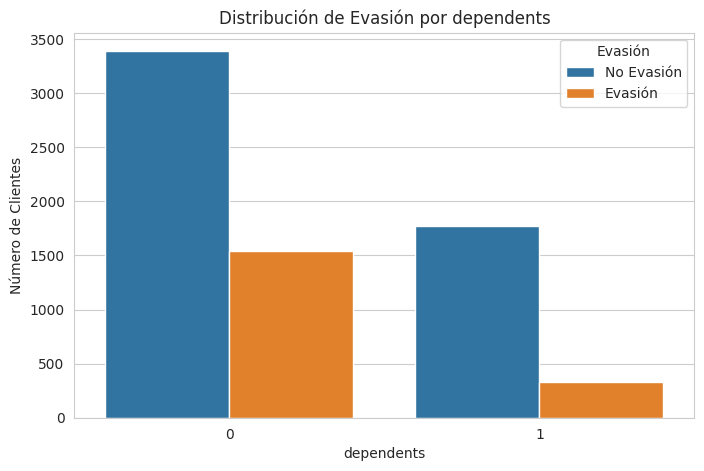


Distribución de 'dependents' por 'churn':


churn,0,1
dependents,,
0,3390,1543
1,1773,326


--------------------------------------------------


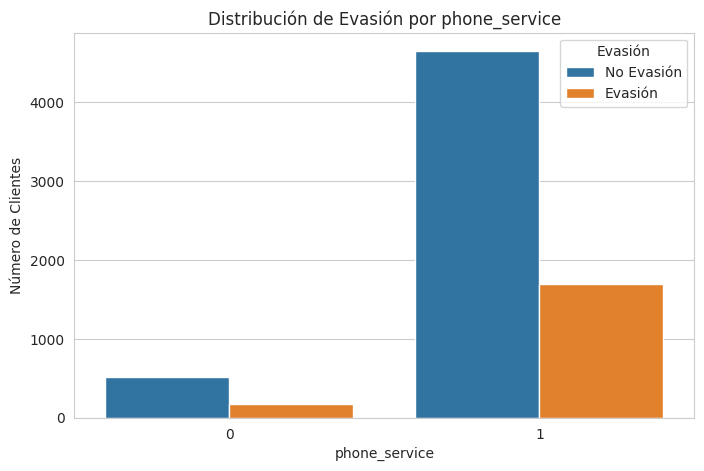


Distribución de 'phone_service' por 'churn':


churn,0,1
phone_service,,
0,510,170
1,4653,1699


--------------------------------------------------


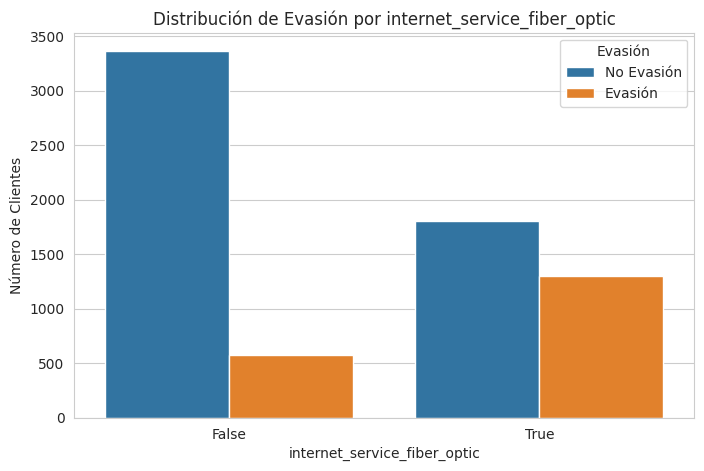


Distribución de 'internet_service_fiber_optic' por 'churn':


churn,0,1
internet_service_fiber_optic,,
False,3364,572
True,1799,1297


--------------------------------------------------


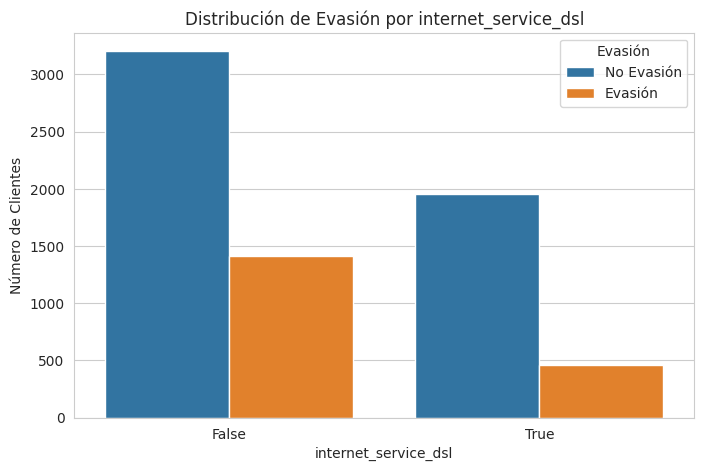


Distribución de 'internet_service_dsl' por 'churn':


churn,0,1
internet_service_dsl,,
False,3206,1410
True,1957,459


--------------------------------------------------


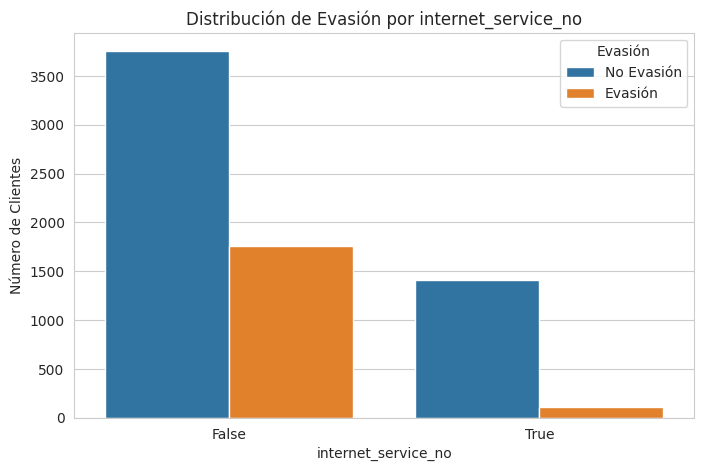


Distribución de 'internet_service_no' por 'churn':


churn,0,1
internet_service_no,,
False,3756,1756
True,1407,113


--------------------------------------------------


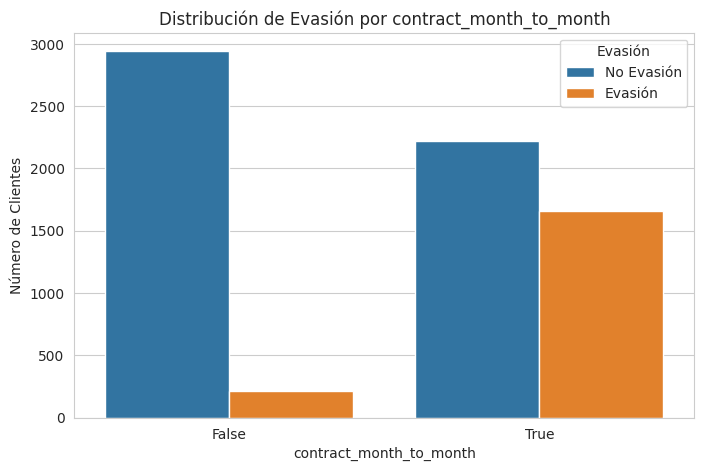


Distribución de 'contract_month_to_month' por 'churn':


churn,0,1
contract_month_to_month,,
False,2943,214
True,2220,1655


--------------------------------------------------


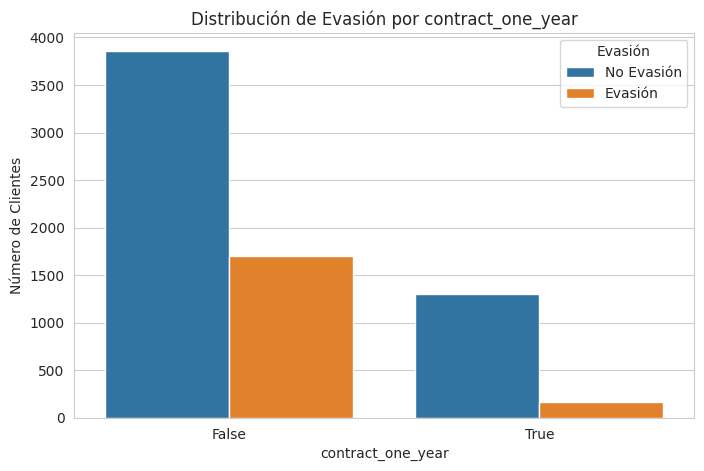


Distribución de 'contract_one_year' por 'churn':


churn,0,1
contract_one_year,,
False,3857,1703
True,1306,166


--------------------------------------------------


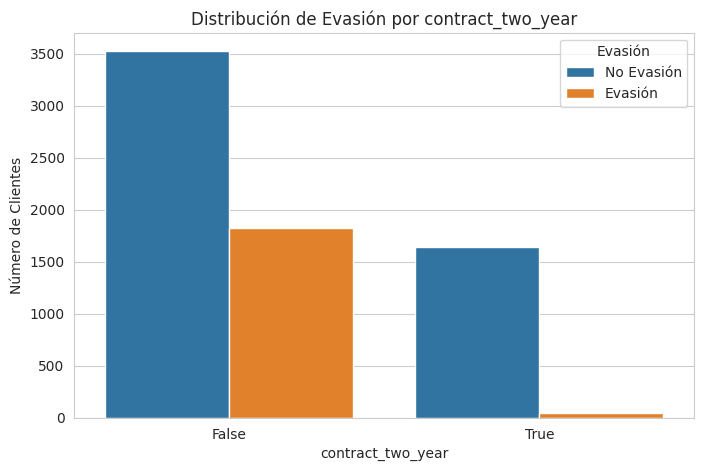


Distribución de 'contract_two_year' por 'churn':


churn,0,1
contract_two_year,,
False,3526,1821
True,1637,48


--------------------------------------------------


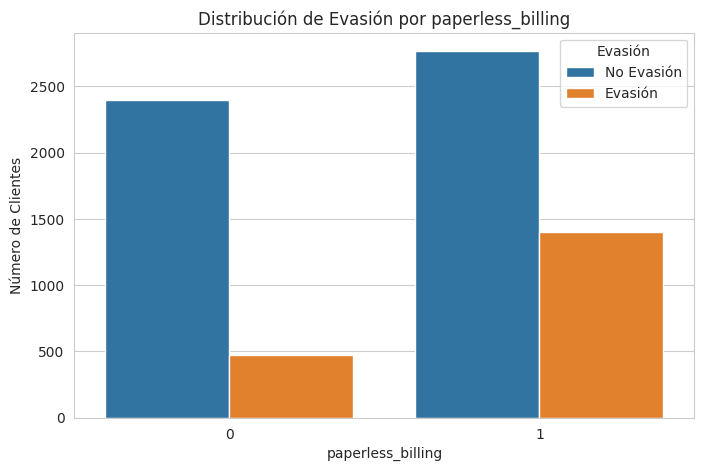


Distribución de 'paperless_billing' por 'churn':


churn,0,1
paperless_billing,,
0,2395,469
1,2768,1400


--------------------------------------------------


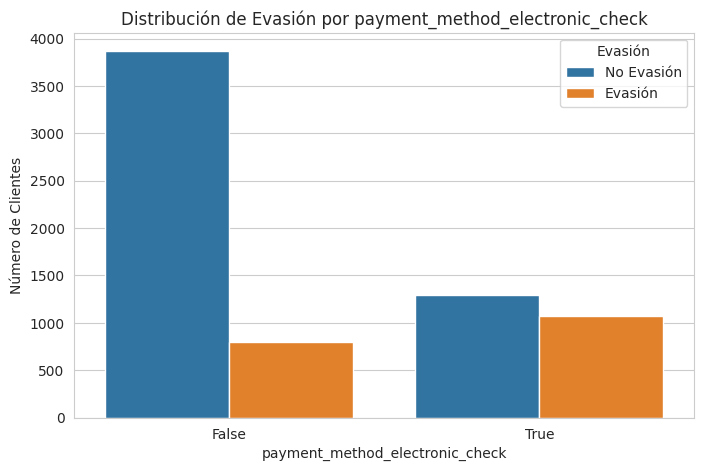


Distribución de 'payment_method_electronic_check' por 'churn':


churn,0,1
payment_method_electronic_check,,
False,3869,798
True,1294,1071


--------------------------------------------------


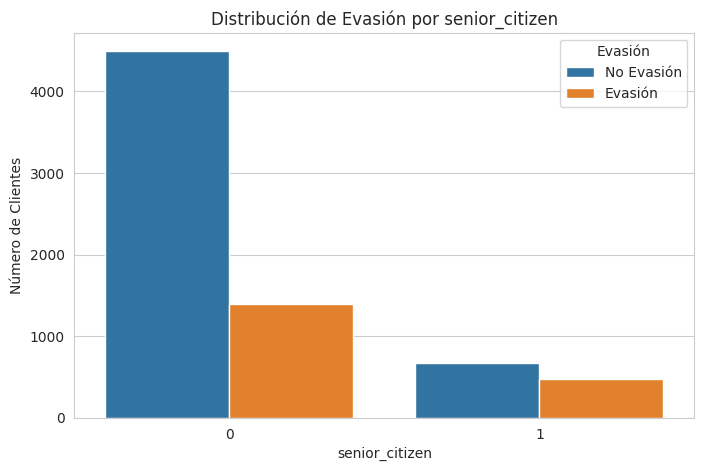


Distribución de 'senior_citizen' por 'churn':


churn,0,1
senior_citizen,,
0,4497,1393
1,666,476


--------------------------------------------------


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set_style("whitegrid")

# List of categorical columns to analyze against churn
categorical_cols_for_churn = [
    'gender_Female', 'gender_Male', 'partner', 'dependents', 'phone_service',
    'internet_service_fiber_optic', 'internet_service_dsl', 'internet_service_no',
    'contract_month_to_month', 'contract_one_year', 'contract_two_year',
    'paperless_billing', 'payment_method_electronic_check', 'senior_citizen'
]

# Create count plots for each categorical column against 'churn'
for col in categorical_cols_for_churn:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, hue='churn', data=df_encoded)
    plt.title(f'Distribución de Evasión por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=0) # Keep labels horizontal for better readability
    plt.legend(title='Evasión', labels=['No Evasión', 'Evasión'])
    plt.show()

    # Display value counts for better understanding of distribution
    print(f"\nDistribución de '{col}' por 'churn':")
    display(pd.crosstab(df_encoded[col], df_encoded['churn']))
    print("-" * 50)

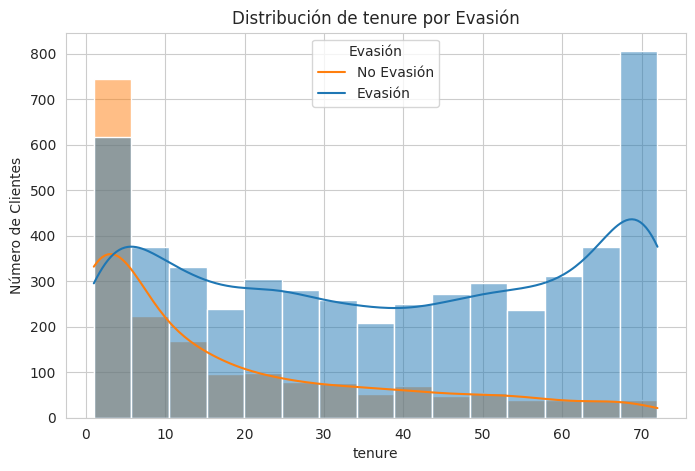

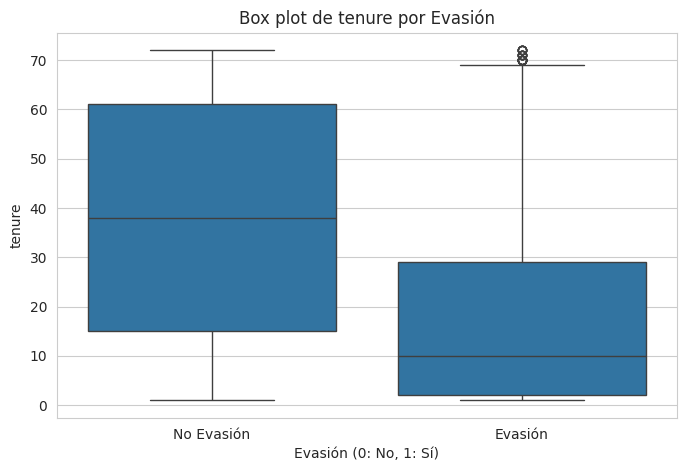

--------------------------------------------------


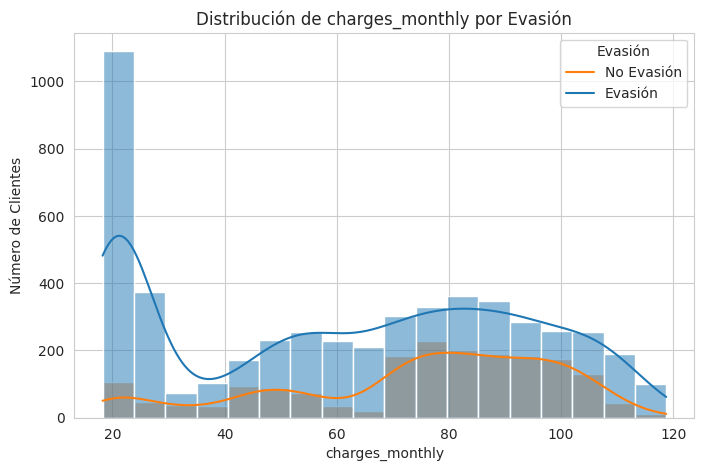

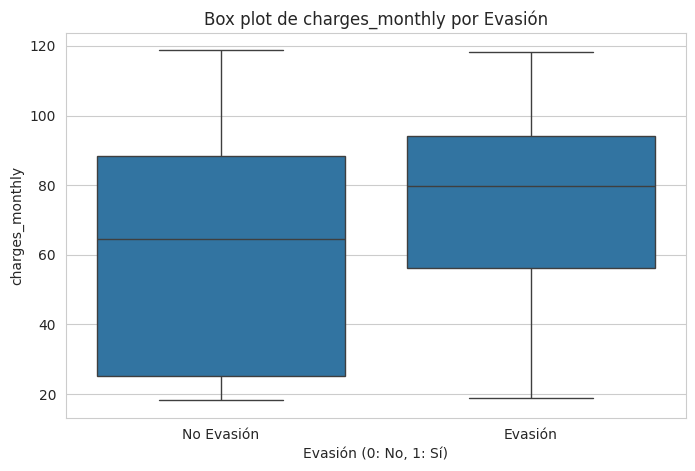

--------------------------------------------------


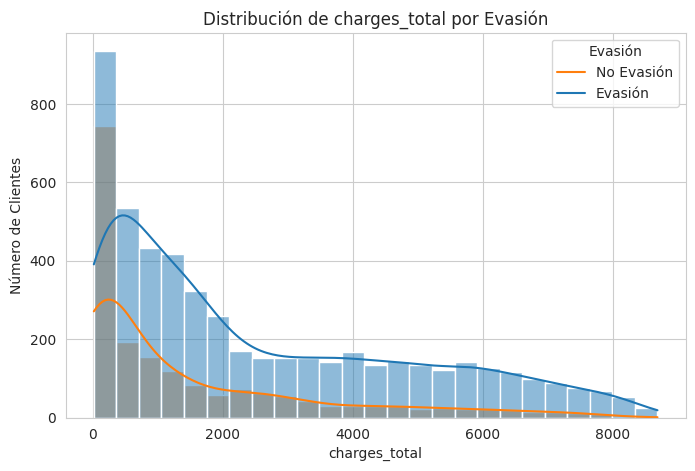

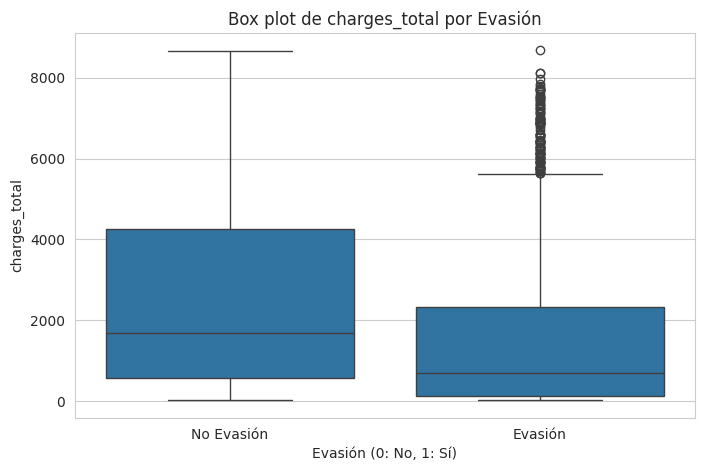

--------------------------------------------------


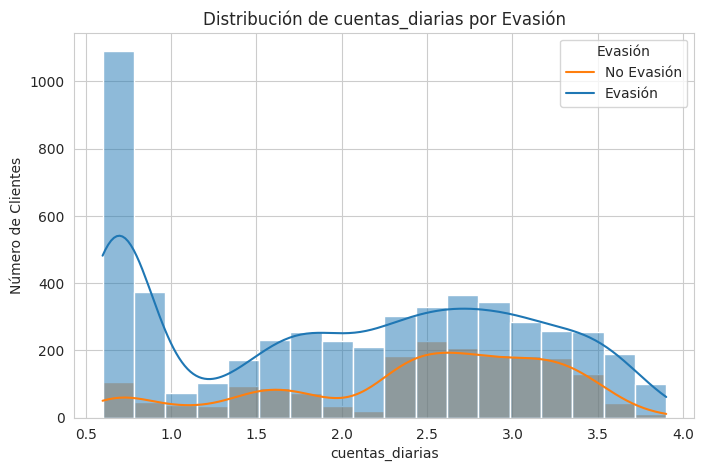

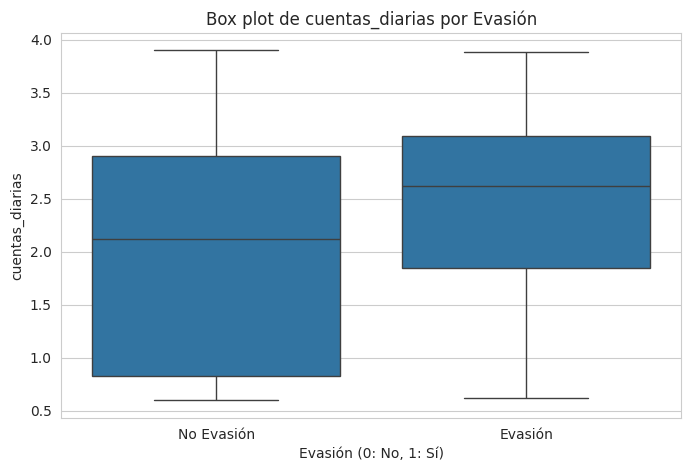

--------------------------------------------------


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set_style("whitegrid")

# List of numerical columns to analyze against churn
numerical_cols_for_churn = ['tenure', 'charges_monthly', 'charges_total', 'cuentas_diarias']

# Create plots for each numerical column against 'churn'
for col in numerical_cols_for_churn:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_encoded, x=col, hue='churn', kde=True, common_norm=False)
    plt.title(f'Distribución de {col} por Evasión')
    plt.xlabel(col)
    plt.ylabel('Número de Clientes')
    plt.legend(title='Evasión', labels=['No Evasión', 'Evasión'])
    plt.show()

    # Optionally, you can also use box plots for a different perspective on distribution
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_encoded, x='churn', y=col)
    plt.title(f'Box plot de {col} por Evasión')
    plt.xlabel('Evasión (0: No, 1: Sí)')
    plt.ylabel(col)
    plt.xticks(ticks=[0, 1], labels=['No Evasión', 'Evasión'])
    plt.show()

    print("-" * 50)

Matriz de correlación:


,churn,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,internet_service_dsl,internet_service_fiber_optic,internet_service_no,contract_month_to_month,contract_one_year,contract_two_year,payment_method_bank_transfer_automatic,payment_method_credit_card_automatic,payment_method_electronic_check,payment_method_mailed_check
churn,1.000000,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.040033,-0.171270,-0.082307,-0.066193,...,-0.124141,0.307463,-0.227578,0.404565,-0.178225,-0.301552,-0.118136,-0.134687,0.301455,-0.090773
senior_citizen,0.150541,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,...,-0.108276,0.254923,-0.182519,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
partner,-0.149982,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,...,-0.001043,0.001235,-0.000286,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
dependents,-0.163128,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,...,0.051593,-0.164101,0.138383,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
tenure,-0.354049,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,...,0.013786,0.017930,-0.037529,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
phone_service,0.011691,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,...,-0.452255,0.290183,0.171817,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
multiple_lines,0.040033,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,...,-0.200318,0.366420,-0.210794,-0.088558,-0.003594,0.106618,0.075429,0.060319,0.083583,-0.227672
online_security,-0.171270,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,...,0.320343,-0.030506,-0.332799,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918
online_backup,-0.082307,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,...,0.156765,0.165940,-0.380990,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075
device_protection,-0.066193,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,...,0.145150,0.176356,-0.380151,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325


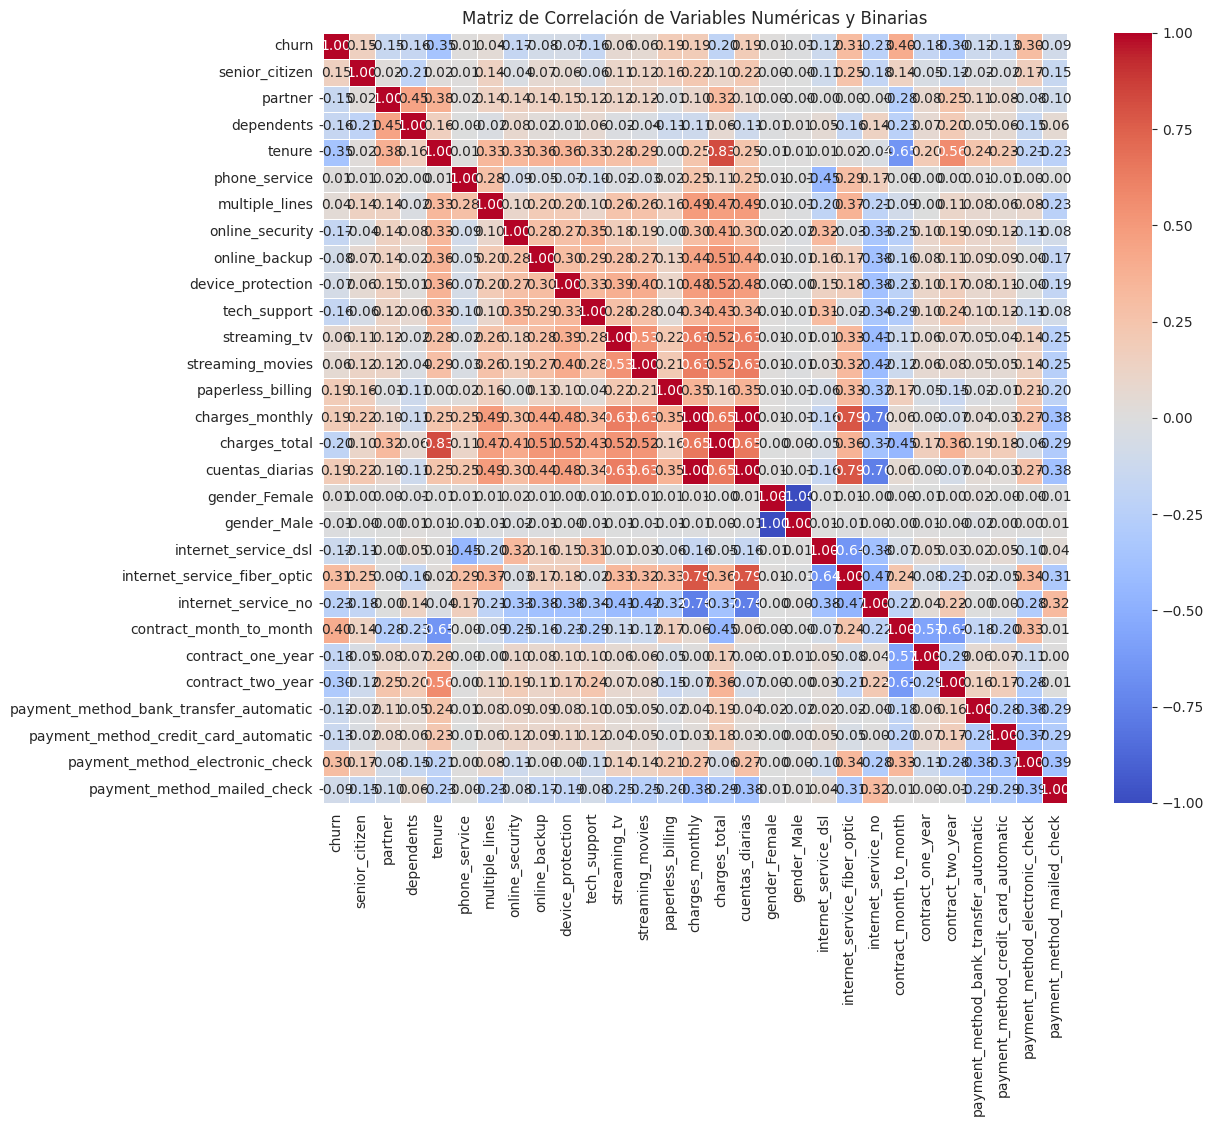

In [27]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df_encoded.corr(numeric_only=True)

# Display the correlation matrix
print("Matriz de correlación:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas y Binarias')
plt.show()

## Preparación de Datos para Modelado

Separar las características (variables predictoras) de la variable objetivo ('churn') y dividir el dataset en conjuntos de entrenamiento y prueba.

In [28]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
# Excluimos 'customer_id' ya que no es una característica predictiva
X = df_encoded.drop(columns=['customer_id', 'churn'])
y = df_encoded['churn']

# Dividir el dataset en conjuntos de entrenamiento y prueba
# Usaremos un 80% para entrenamiento y un 20% para prueba, con un estado aleatorio para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dimensiones del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento (X_train, y_train): (5625, 28) (5625,)
Dimensiones del conjunto de prueba (X_test, y_test): (1407, 28) (1407,)


In [29]:
from sklearn.linear_model import LogisticRegression

# Instantiate the chosen model
# Logistic Regression is a good starting point for binary classification problems
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## EVALUACION DE MODELO


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Model Performance on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Model Performance on Test Data:
Accuracy: 0.7967
Precision: 0.6438
Recall: 0.5267
F1-Score: 0.5794


In [31]:
# Access the coefficients of the trained Logistic Regression model
coefficients = model.coef_[0]

# Create a pandas Series from the coefficients
feature_importance = pd.Series(coefficients, index=X_train.columns)

# Sort the coefficients by their absolute values in descending order
sorted_feature_importance = feature_importance.abs().sort_values(ascending=False)

# Print the sorted coefficients (showing the original coefficient values)
print("Importancia de Características (coeficientes de la regresión logística, ordenados por valor absoluto):")
display(feature_importance[sorted_feature_importance.index])

Importancia de Características (coeficientes de la regresión logística, ordenados por valor absoluto):


,0
contract_two_year,-0.760060
internet_service_no,-0.680435
phone_service,-0.636602
contract_month_to_month,0.553442
tech_support,-0.481760
internet_service_fiber_optic,0.424299
online_security,-0.407882
paperless_billing,0.368481
senior_citizen,0.252783
payment_method_credit_card_automatic,-0.245749


**Reasoning**:
Summarize the findings from the feature importance analysis and then finish the task.



In [32]:
print("\nSummary of Feature Importance Analysis:")
print("The logistic regression model coefficients provide insights into the importance of each feature for predicting churn.")
print("The features are listed below in descending order of their absolute coefficient values:")
display(feature_importance[sorted_feature_importance.index])
print("\nA larger absolute coefficient value indicates a stronger influence (positive or negative) on the predicted probability of churn.")
print("Positive coefficients (e.g., contract_month_to_month) increase the probability of churn, while negative coefficients (e.g., contract_two_year, internet_service_no, phone_service) decrease it.")


Summary of Feature Importance Analysis:
The logistic regression model coefficients provide insights into the importance of each feature for predicting churn.
The features are listed below in descending order of their absolute coefficient values:


,0
contract_two_year,-0.760060
internet_service_no,-0.680435
phone_service,-0.636602
contract_month_to_month,0.553442
tech_support,-0.481760
internet_service_fiber_optic,0.424299
online_security,-0.407882
paperless_billing,0.368481
senior_citizen,0.252783
payment_method_credit_card_automatic,-0.245749



A larger absolute coefficient value indicates a stronger influence (positive or negative) on the predicted probability of churn.
Positive coefficients (e.g., contract_month_to_month) increase the probability of churn, while negative coefficients (e.g., contract_two_year, internet_service_no, phone_service) decrease it.


# Informe Final del Análisis de Evasión de Clientes (Churn) - TELECOM X

## Introducción

Este informe detalla el análisis exploratorio y la preparación de datos realizados para comprender y abordar el problema de la evasión de clientes (Churn) en Telecom X. El objetivo principal es identificar los factores que influyen en la decisión de un cliente de cancelar su servicio y sentar las bases para un futuro modelo predictivo que ayude a retener a los clientes en riesgo. La evasión de clientes es un desafío crítico para las empresas de telecomunicaciones, ya que la adquisición de nuevos clientes es significativamente más costosa que la retención de los existentes.

## Limpieza y Tratamiento de Datos

En esta sección, se describen los pasos clave realizados para importar, limpiar y transformar el dataset original, asegurando que los datos estén en un formato adecuado y de alta calidad para el análisis.

1.  **Carga de Datos:** Los datos fueron cargados desde un archivo JSON (`TelecomX_Data.json`) utilizando la biblioteca pandas. El dataset inicial contenía información anidada en algunas columnas.

2.  **Exploración Inicial y Estructura del Dataset:** Se realizó una exploración inicial para entender la estructura del DataFrame, incluyendo los nombres de las columnas y sus tipos de datos. Se identificaron columnas con datos anidados ('customer', 'phone', 'internet', 'account') y la necesidad de aplanarlas.

3.  **Verificación de Valores Ausentes y Duplicados:** Se verificó la presencia de valores ausentes y filas duplicadas. Inicialmente, no se encontraron duplicados en la columna 'customerID'. Después de aplanar las columnas, se identificaron valores ausentes resultantes de la transformación de campos vacíos en la columna 'Churn' y errores de formato en 'Charges.Total'.

4.  **Aplanamiento de Columnas Anidadas:** Las columnas con estructuras anidadas fueron aplanadas, expandiendo los diccionarios internos en nuevas columnas individuales en el DataFrame. Esto hizo que todos los atributos fueran directamente accesibles.

5.  **Manejo de Inconsistencias y Errores de Formato:** Se abordaron las inconsistencias identificadas:
    *   Los valores vacíos en la columna 'Churn' fueron reemplazados por `pd.NA` y luego las filas con valores ausentes en 'Churn' y 'Charges.Total' fueron eliminadas.
    *   La columna 'Charges.Total', que inicialmente era de tipo 'object' debido a entradas no numéricas, se convirtió a tipo numérico (`float64`), manejando los errores mediante coerción a `NaN` (aunque las filas con estos `NaN` ya fueron eliminadas en el paso anterior).
    *   Se estandarizó la capitalización en la columna 'gender'.
    *   Se unificaron valores inconsistentes en columnas relacionadas con servicios (por ejemplo, 'No internet service' se estandarizó a 'No').

6.  **Creación de Nuevas Características:** Se creó la columna 'Cuentas\_Diarias' dividiendo 'Charges.Monthly' por el promedio de días en un mes (30.44) para obtener una perspectiva diaria de los cargos.

7.  **Codificación de Variables Categóricas:** Las variables categóricas binarias ('Yes'/'No') se convirtieron a representación numérica (1/0). Las variables categóricas con más de dos categorías únicas fueron codificadas utilizando One-Hot Encoding, creando nuevas columnas binarias para cada categoría.

8.  **Cambio de Nombre de Columnas:** Se renombraron las columnas para mejorar la legibilidad y consistencia, adoptando un formato snake\_case y eliminando caracteres especiales.

Después de estos pasos de limpieza y tratamiento, el dataset está en un formato limpio y estructurado, listo para el análisis y modelado.

## Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos se centró en comprender las características de los clientes y cómo se relacionan con la evasión.

1.  **Análisis Descriptivo:** Se calcularon estadísticas descriptivas (media, mediana, desviación estándar, etc.) para las columnas numéricas y se analizaron las distribuciones de las columnas booleanas (derivadas de la codificación one-hot). Esto proporcionó una visión general de los rangos de valores, la dispersión y la frecuencia de las categorías.

2.  **Distribución de la Variable Objetivo ('Churn'):** Se visualizó la distribución de la variable 'churn' utilizando un gráfico de barras. Se confirmó que el dataset presenta un desbalance de clases significativo, con una mayor proporción de clientes que no han evadido.

3.  **Recuento de Evasión por Variables Categóricas:** Se crearon gráficos de barras (countplot) para visualizar la distribución de la evasión en relación con varias variables categóricas clave (género, pareja, dependientes, servicio telefónico, servicio de internet, tipo de contrato, facturación electrónica, método de pago, ciudadano senior). Estos gráficos revelaron visualmente qué categorías tienen tasas de evasión más altas o más bajas (por ejemplo, clientes con contrato mes a mes, servicio de internet de fibra óptica o pago electrónico mostraron mayores tasas de evasión). Se complementó con tablas de contingencia para obtener los recuentos exactos.

4.  **Distribución de Evasión por Variables Numéricas:** Se utilizaron histogramas y box plots para examinar la distribución de variables numéricas ('tenure', 'charges_monthly', 'charges_total', 'cuentas_diarias') para los grupos de clientes que evadieron y los que no. Esto mostró, por ejemplo, que los clientes con menor antigüedad ('tenure') y mayores cargos mensuales ('charges_monthly') tienden a tener una mayor probabilidad de evadir.

5.  **Análisis de Correlación:** Se calculó y visualizó la matriz de correlación para todas las variables numéricas y binarias utilizando un heatmap. Esto cuantificó la fuerza y dirección de las relaciones lineales. Se identificaron variables con correlaciones positivas con 'churn' (aumentan la probabilidad de evasión) y variables con correlaciones negativas (disminuyen la probabilidad de evasión). También se observaron correlaciones entre las variables predictoras.

## Conclusiones e Insights

Basado en el análisis exploratorio y de correlación realizado, se pueden extraer las siguientes conclusiones e insights clave que pueden ayudar a Telecom X a comprender y potencialmente reducir la evasión de clientes:

*   **Factores de Mayor Influencia en la Evasión:** El análisis de correlación y las visualizaciones sugieren que el tipo de contrato es un factor muy influyente. Los clientes con contratos **mes a mes** tienen una probabilidad significativamente mayor de evadir en comparación con aquellos con contratos a largo plazo (uno o dos años).
*   **Servicios Relacionados con Alta Evasión:** Los clientes que utilizan el servicio de internet de **fibra óptica** parecen tener una tasa de evasión más alta que aquellos con DSL o sin servicio de internet. Esto podría indicar problemas de calidad del servicio, expectativas no cumplidas o competencia en el mercado de fibra óptica.
*   **Métodos de Pago y Evasión:** El método de pago **electrónico (Electronic check)** está asociado con una mayor tasa de evasión. Esto podría estar relacionado con la facilidad de cambiar de proveedor para estos clientes o insatisfacción con el proceso de facturación electrónica.
*   **Antigüedad del Cliente:** Los clientes con **menor antigüedad ('tenure')** tienen una mayor probabilidad de evadir. Esto resalta la importancia de las estrategias de incorporación y retención temprana de clientes.
*   **Cargos Mensuales:** Clientes con **cargos mensuales más altos ('charges_monthly')** muestran una tendencia a evadir. Esto podría estar relacionado con la percepción del valor por el precio o la sensibilidad al precio.
*   **Servicios de Valor Añadido:** La ausencia de servicios como **seguridad online ('online_security')** y **soporte técnico ('tech_support')** parece estar asociada con una mayor probabilidad de evasión, lo que sugiere que estos servicios pueden contribuir a la satisfacción y retención del cliente.
*   **Clientes con Pareja/Dependientes y Ciudadanos Senior:** Los clientes con **pareja ('partner')** y **dependientes ('dependents')** tienden a evadir menos, mientras que los **ciudadanos senior ('senior_citizen')** muestran una mayor propensión a evadir.

**Recomendaciones y Próximos Pasos Basados en los Insights:**

*   **Programas de Retención para Contratos Mes a Mes:** Implementar programas específicos para incentivar a los clientes con contratos mes a mes a cambiarse a contratos de mayor duración, ofreciendo descuentos o beneficios adicionales.
*   **Mejorar la Experiencia del Cliente de Fibra Óptica:** Investigar las causas detrás de la mayor evasión entre los usuarios de fibra óptica. Podría implicar mejorar la calidad del servicio, la atención al cliente o la comunicación sobre los beneficios del servicio.
*   **Optimizar el Proceso de Pago Electrónico:** Analizar si hay fricciones o problemas en el proceso de pago electrónico que puedan estar contribuyendo a la evasión.
*   **Estrategias de Incorporación para Nuevos Clientes:** Desarrollar programas de bienvenida y seguimiento intensivo para los clientes con baja antigüedad para asegurar su satisfacción inicial.
*   **Evaluar la Estructura de Cargos:** Analizar si la estructura de precios o los cargos mensuales son un factor de insatisfacción para ciertos segmentos de clientes.
*   **Promocionar Servicios de Valor Añadido:** Destacar los beneficios de servicios como seguridad online y soporte técnico para los clientes que actualmente no los tienen, ya que parecen ser factores de retención.
*   **Segmentación y Ofertas Personalizadas:** Utilizar los insights sobre ciudadanos senior y clientes sin pareja/dependientes para crear ofertas y comunicaciones personalizadas que aborden sus necesidades específicas.

Este análisis proporciona una base sólida para entender los impulsores de la evasión en Telecom X. Los próximos pasos lógicos serían utilizar este conocimiento para construir y desplegar un modelo predictivo de evasión que pueda identificar a los clientes en riesgo proactivamente, permitiendo a la empresa intervenir con estrategias de retención dirigidas.